In [2]:
import os
import PIL
import PIL.Image
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

import pathlib

In [3]:
dataset_url = "http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/EnglishImg.tgz"
data_dir_raw = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='English',
                                   untar=True)
data_dir = pathlib.Path(data_dir_raw)

In [4]:
image_count = len(list(data_dir.glob('Img\*\Bmp\*\*.png')))
print(image_count)
print(data_dir)

12503
C:\Users\tyler\.keras\datasets\English


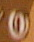

In [5]:
characters = list(data_dir.glob('Img\*\Bmp\*\*'))
PIL.Image.open(str(characters[0]))

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
good_img_chars_dir = pathlib.Path(data_dir_raw + "\Img\GoodImg\Bmp")
train_ds = tf.keras.utils.image_dataset_from_directory(
  good_img_chars_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7705 files belonging to 62 classes.
Using 6164 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  good_img_chars_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 7705 files belonging to 62 classes.
Using 1541 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['Sample001', 'Sample002', 'Sample003', 'Sample004', 'Sample005', 'Sample006', 'Sample007', 'Sample008', 'Sample009', 'Sample010', 'Sample011', 'Sample012', 'Sample013', 'Sample014', 'Sample015', 'Sample016', 'Sample017', 'Sample018', 'Sample019', 'Sample020', 'Sample021', 'Sample022', 'Sample023', 'Sample024', 'Sample025', 'Sample026', 'Sample027', 'Sample028', 'Sample029', 'Sample030', 'Sample031', 'Sample032', 'Sample033', 'Sample034', 'Sample035', 'Sample036', 'Sample037', 'Sample038', 'Sample039', 'Sample040', 'Sample041', 'Sample042', 'Sample043', 'Sample044', 'Sample045', 'Sample046', 'Sample047', 'Sample048', 'Sample049', 'Sample050', 'Sample051', 'Sample052', 'Sample053', 'Sample054', 'Sample055', 'Sample056', 'Sample057', 'Sample058', 'Sample059', 'Sample060', 'Sample061', 'Sample062']


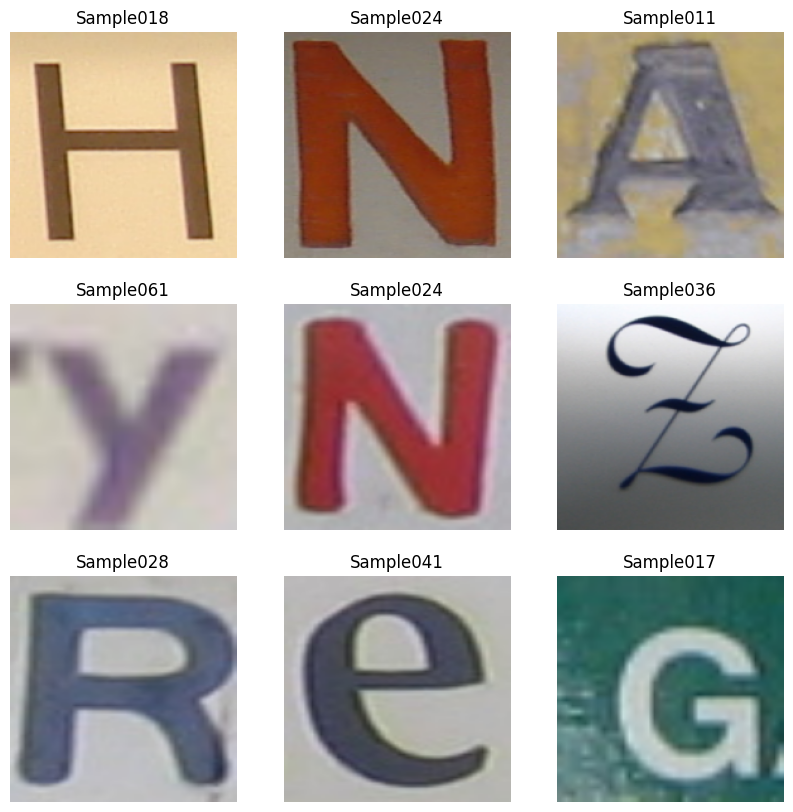

In [10]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
num_classes = 62
regularization_factor = 0.0001
dropout_factor = 0.5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_factor)),
  tf.keras.layers.Dropout(dropout_factor),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_factor)),
  tf.keras.layers.Dropout(dropout_factor),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_factor)),
  tf.keras.layers.Dropout(dropout_factor),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(regularization_factor)),
  tf.keras.layers.Dropout(dropout_factor),
  tf.keras.layers.Dense(num_classes)
])

In [13]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
193/193 [==============================] - 139s 714ms/step - loss: 4.0898 - accuracy: 0.0449 - val_loss: 4.0235 - val_accuracy: 0.0597
Epoch 2/10
193/193 [==============================] - 135s 695ms/step - loss: 3.8935 - accuracy: 0.0595 - val_loss: 3.9388 - val_accuracy: 0.0597
Epoch 3/10
193/193 [==============================] - 131s 680ms/step - loss: 3.8466 - accuracy: 0.0720 - val_loss: 3.9256 - val_accuracy: 0.0597
Epoch 4/10
193/193 [==============================] - 127s 656ms/step - loss: 3.6539 - accuracy: 0.1262 - val_loss: 3.7354 - val_accuracy: 0.1694
Epoch 5/10
193/193 [==============================] - 131s 678ms/step - loss: 3.1910 - accuracy: 0.2364 - val_loss: 3.4392 - val_accuracy: 0.3329
Epoch 6/10
193/193 [==============================] - 134s 695ms/step - loss: 2.8180 - accuracy: 0.3034 - val_loss: 3.2052 - val_accuracy: 0.3796
Epoch 7/10
193/193 [==============================] - 135s 701ms/step - loss: 2.5162 - accuracy: 0.3701 - val_loss: 3.0272 -

In [15]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
193/193 [==============================] - 129s 670ms/step - loss: 1.8745 - accuracy: 0.4940 - val_loss: 2.5585 - val_accuracy: 0.5821
Epoch 2/10
193/193 [==============================] - 131s 678ms/step - loss: 1.7608 - accuracy: 0.5279 - val_loss: 2.4105 - val_accuracy: 0.6035
Epoch 3/10
193/193 [==============================] - 129s 669ms/step - loss: 1.6912 - accuracy: 0.5368 - val_loss: 2.3298 - val_accuracy: 0.6016
Epoch 4/10
193/193 [==============================] - 132s 684ms/step - loss: 1.6029 - accuracy: 0.5701 - val_loss: 2.3004 - val_accuracy: 0.6197
Epoch 5/10
193/193 [==============================] - 130s 676ms/step - loss: 1.5451 - accuracy: 0.5818 - val_loss: 2.2100 - val_accuracy: 0.6230
Epoch 6/10
193/193 [==============================] - 128s 665ms/step - loss: 1.4962 - accuracy: 0.5907 - val_loss: 2.2134 - val_accuracy: 0.6308
Epoch 7/10
193/193 [==============================] - 128s 665ms/step - loss: 1.4699 - accuracy: 0.5959 - val_loss: 2.2029 -

In [16]:
# Save the weights
model.save_weights('./checkpoints/chars_checkpoint_1')

In [17]:
#fine_tune_at should be the number of layers before the MLP classifier
fine_tune_at = 11
for layer in model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

In [18]:
fine_tune_epochs = 10
total_epochs =  10 + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

NameError: name 'history' is not defined